<a href="https://colab.research.google.com/github/geonextgis/Mastering-Machine-Learning-and-GEE-for-Earth-Science/blob/main/03_Feature_Engineering/01__Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Normalization - Feature Scaling**
Normalization, also known as Min-Max scaling, is a feature scaling technique used in data preprocessing to rescale numerical features to a specific range, typically between 0 and 1. The goal of normalization is to ensure that all feature values have similar scales, making them more suitable for machine learning algorithms that are sensitive to the magnitude of input features.

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBOZqDiNcILVqNqUPmDj8r3I7f_GYD9Op6qrjK1BB8r5iKASSzZoyWOTv4HE4V2JVYGx0&usqp=CAU"></ceneter>

## **When to use Normalization?**

<center><img src="https://miro.medium.com/max/1400/1*qRmiffZgkNaXnTBZwDafCA.png" width="80%"></center>

# **Example**

## **Import Required Libraries**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## **Read the Data**

In [4]:
# Read some specific column from the data
csv_path = r"/content/drive/MyDrive/Colab Notebooks/GitHub Repo/Mastering-Machine-Learning-and-GEE-for-Earth-Science/Datasets/wine_data.csv"
df = pd.read_csv(csv_path, usecols=["Class", "Alcohol", "Malic acid"])
df.head()

,Class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [5]:
df.shape

(178, 3)

## **Data Visualization**

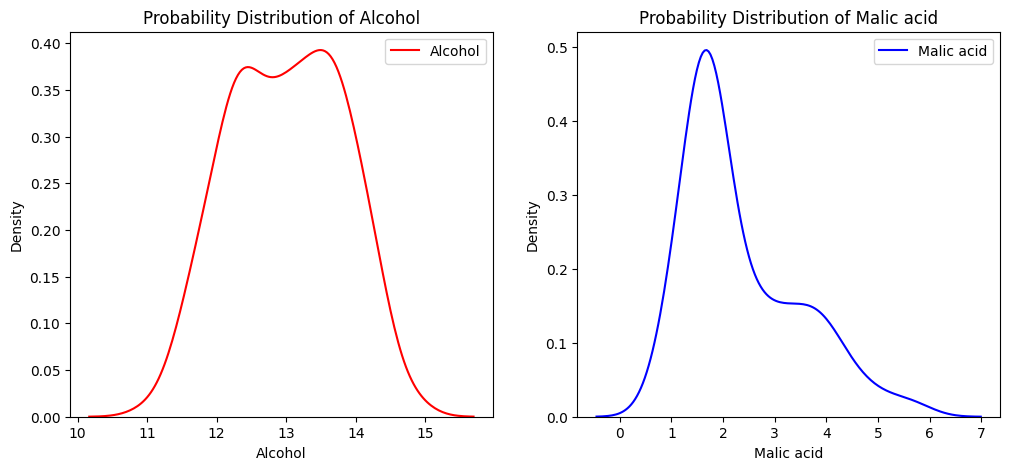

In [7]:
# Creating probabilty density plots of the data
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(data=df["Alcohol"], ax=ax1, c="red", label="Alcohol")
ax1.set_title("Probability Distribution of Alcohol")
ax1.legend()

sns.kdeplot(data=df["Malic acid"], ax=ax2, c="blue", label="Malic acid")
ax2.set_title("Probability Distribution of Malic acid")
ax2.legend()

plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

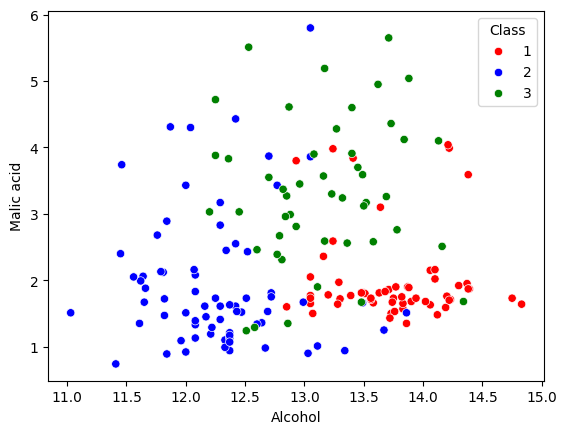

In [8]:
# Creating a scatter plot of the data
sns.scatterplot(x=df["Alcohol"], y=df["Malic acid"], hue=df["Class"], palette=["red", "blue", "green"])

## **Train Test Split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class", axis=1),
                                                    df["Class"],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

## **MinMax Scaler**
The Min-Max Scaler is a feature scaling technique used in machine learning to transform and normalize the values of features within a specific range. It is particularly useful when dealing with features that have varying scales, as it helps ensure that all features contribute equally to the learning process. Min-Max scaling transforms the original values of features to a specified range, typically between 0 and 1.

In [16]:
# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# transform always returns a numpy array
# Converting the scaled numpy arrays into pandas dataframes
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=["Alcohol", "Malic acid"])
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=["Alcohol", "Malic acid"])

In [18]:
X_train.head()

,Alcohol,Malic acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51


In [19]:
X_train_scaled.head()

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [20]:
# Describe the training data
np.round(X_train.describe(), 2)

,Alcohol,Malic acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


In [21]:
# Describe the scaled training data
np.round(X_train_scaled.describe(), 2)

,Alcohol,Malic acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


## **Effect of Scaling**

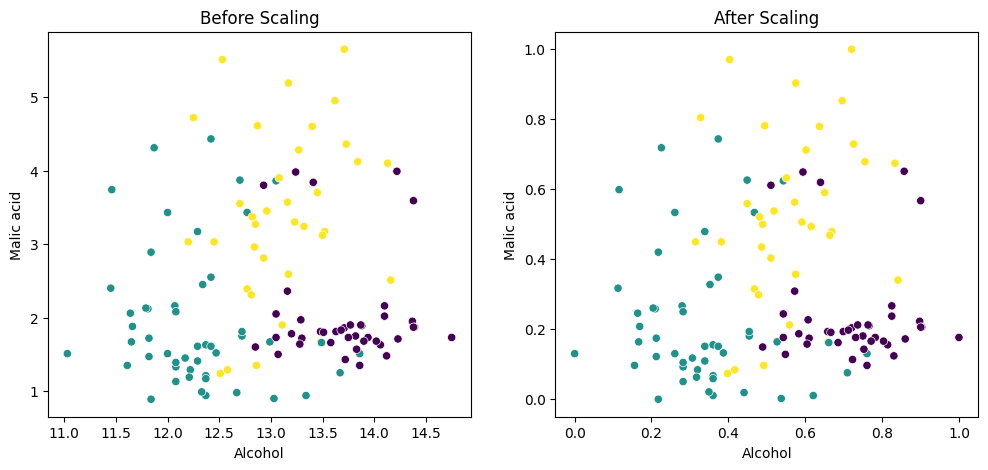

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creating a scatter plot of the training data
sns.scatterplot(data=X_train, x="Alcohol", y="Malic acid", ax=ax1, c=y_train)
ax1.set_title("Before Scaling")

# Creating a scatter plot of the scaled training data
sns.scatterplot(data=X_train_scaled, x="Alcohol", y="Malic acid", ax=ax2, c=y_train)
ax2.set_title("After Scaling")

plt.show()

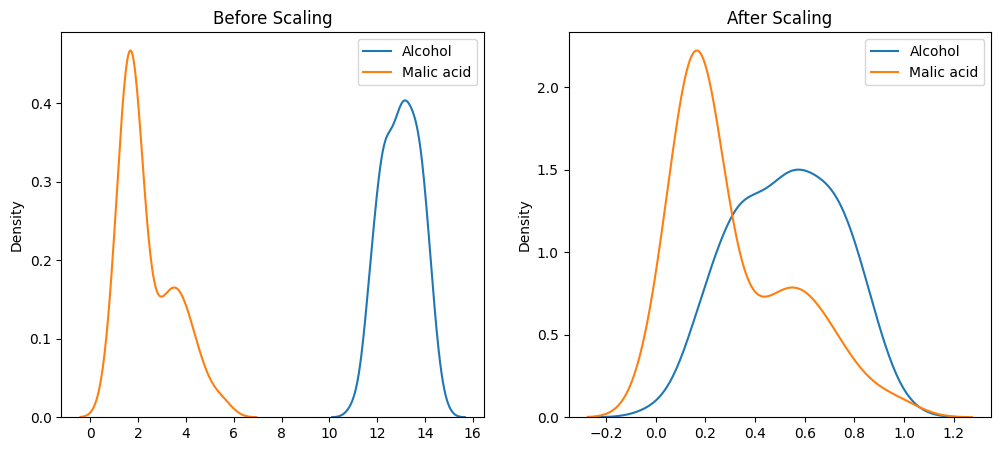

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creating a probability density plot of the training data
sns.kdeplot(data=X_train["Alcohol"], ax=ax1, label="Alcohol")
sns.kdeplot(data=X_train["Malic acid"], ax=ax1, label="Malic acid")
ax1.legend()
ax1.set_xlabel("")
ax1.set_title("Before Scaling")

# Creating a probability density plot of the scaled training data
sns.kdeplot(data=X_train_scaled["Alcohol"], ax=ax2, label="Alcohol")
sns.kdeplot(data=X_train_scaled["Malic acid"], ax=ax2, label="Malic acid")
ax2.legend()
ax2.set_xlabel("")
ax2.set_title("After Scaling")

plt.show()

## **Comparison of Distribution**

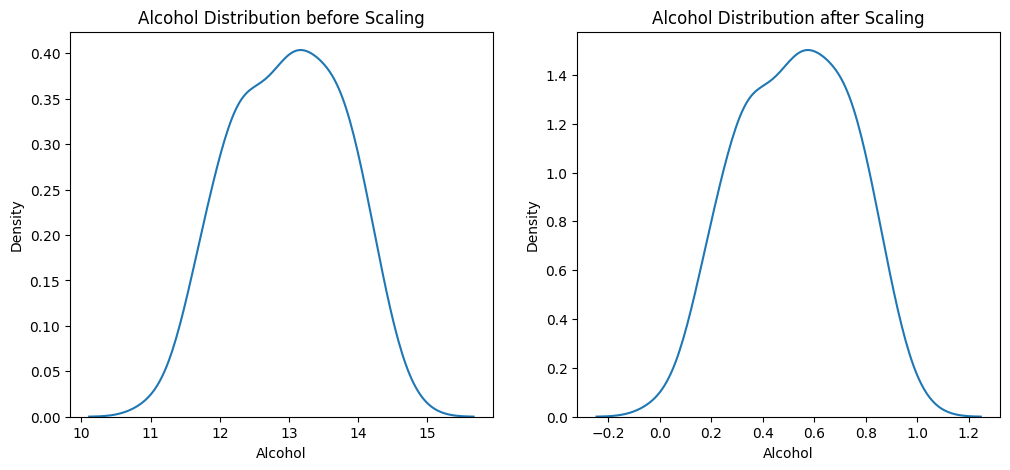

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creating a probabilty density plot of the 'Alcohol' column from the training data
sns.kdeplot(X_train["Alcohol"], ax=ax1)
ax1.set_title("Alcohol Distribution before Scaling")

# Creating a probabilty density plot of the 'Alcohol' column from the scaled training data
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
ax2.set_title("Alcohol Distribution after Scaling")

plt.show()

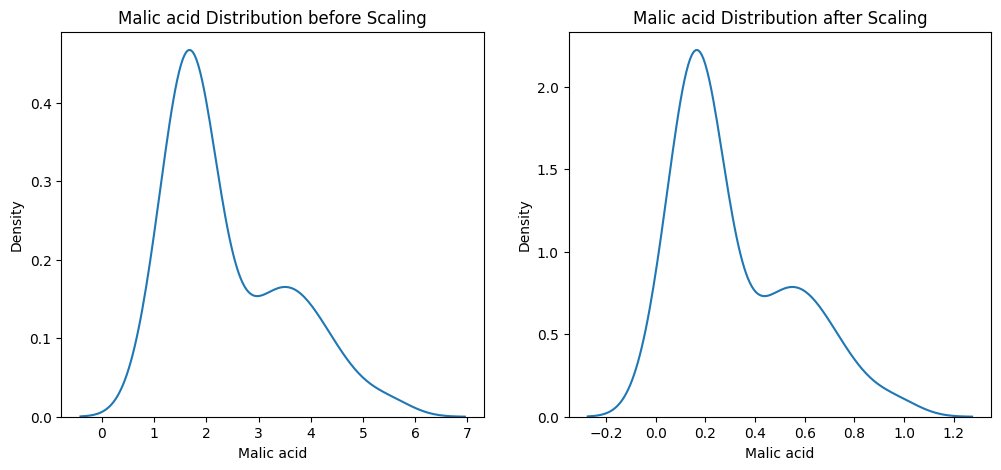

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Creating a probabilty density plot of the 'Malic acid' column from the training data
sns.kdeplot(X_train["Malic acid"], ax=ax1)
ax1.set_title("Malic acid Distribution before Scaling")

# Creating a probabilty density plot of the 'Malic acid' column from the scaled training data
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
ax2.set_title("Malic acid Distribution after Scaling")

plt.show()

🤔 **Note:**<br>
**Difference between Standardization and Normalization**<br>
Standardization and normalization are two common techniques for feature scaling in data preprocessing, and they have different approaches and effects on the data:

**Goal:**<br>
* **Standardization:** The goal of standardization is to transform the data in such a way that it has a mean of 0 and a standard deviation of 1. It centers the data around zero and scales it by the standard deviation.

* **Normalization:** The goal of normalization is to rescale the data to a specific range, typically between 0 and 1. It preserves the relative relationships between data points but scales them to fit within the chosen range.

<br>

<center><img src="https://miro.medium.com/v2/resize:fit:744/1*HW7-kYjj6RKwrO-5WTLkDA.png" width="70%"></center>